# Task1 :  Predicting House Prices

  

**Background:**

- House price prediction is a common task in real estate, finance, and data science.
- Predicting house prices involves analyzing various factors that influence property values.

**Benefits:**

1. **Informed Decision-Making:**
   - Buyers and sellers can make more informed decisions with accurate predictions, leading to better financial outcomes.

2. **Real Estate Investment:**
   - Investors can use predictions to identify lucrative opportunities, optimizing their real estate investment portfolio.

3. **Market Trends Analysis:**
   - Predictive models help in analyzing market trends, enabling stakeholders to understand the dynamics of the real estate market.

4. **Risk Mitigation:**
   - Buyers and sellers can use predictions to mitigate risks associated with property transactions by understanding potential price fluctuations.

5. **Financial Planning:**
   - Individuals can incorporate predicted house prices into their financial planning, assisting in long-term financial goals.

6. **Competitive Pricing:**
   - Sellers can set competitive and realistic prices for their properties, attracting potential buyers and reducing time on the market.

7. **Improved Appraisals:**
   - Appraisers can use predictive models as additional tools for property valuation, enhancing the accuracy of their assessments.

8. **Data-Driven Insights:**
   - Predictive modeling provides data-driven insights into the factors influencing house prices, contributing to a deeper understanding of the real estate market.

9. **Economic Impact Assessment:**
   - Governments and policymakers can use house price predictions to assess the economic impact of real estate fluctuations on local and national levels.

10. **Enhanced User Experience:**
    - Real estate platforms can integrate predictive features to offer users personalized recommendations and a more satisfying experience.

11. **Efficient Transactions:**
    - Faster and more efficient property transactions are facilitated when both buyers and sellers have realistic expectations based on accurate price predictions.

12. **Technological Advancements:**
    - House price prediction tasks contribute to the advancement of machine learning and data science techniques, pushing the boundaries of predictive analytics.

# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# 1. Data Gathering:


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
## Check the size
train.shape

(1460, 81)

In [4]:
## Check the size
test.shape

(1459, 80)

In [5]:
## Basic info on data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## Check basic statistic
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
## Check basic statistic
train.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [8]:
null_counts = train.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("columns_with_nulls for train",columns_with_nulls)



columns_with_nulls for train LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
null_counts = test.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("columns_with_nulls for test",columns_with_nulls)



columns_with_nulls for test MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [10]:
# Assuming df is your DataFrame
columns_to_remove = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 
                     'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 
                     'PoolQC', 'Fence', 'MiscFeature','3SsnPorch', 'ScreenPorch', 'PoolArea',
                     'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition','Street', 'Utilities',
                     'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                     'Exterior2nd', 'Heating', 'Functional', 'PavedDrive']

train = train.drop(columns=columns_to_remove)
train

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,2Story,...,1,Gd,8,0,2,548,0,61,0,208500
1,2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Story,...,1,TA,6,1,2,460,298,0,0,181500
2,3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,2Story,...,1,Gd,6,1,2,608,0,42,0,223500
3,4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,2Story,...,1,Gd,7,1,3,642,0,35,272,140000
4,5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,2Story,...,1,Gd,9,1,3,836,192,84,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Reg,Lvl,Inside,Gtl,Gilbert,2Story,...,1,TA,7,1,2,460,0,40,0,175000
1456,1457,20,RL,13175,Reg,Lvl,Inside,Gtl,NWAmes,1Story,...,1,TA,7,2,2,500,349,0,0,210000
1457,1458,70,RL,9042,Reg,Lvl,Inside,Gtl,Crawfor,2Story,...,1,Gd,9,2,1,252,0,60,0,266500
1458,1459,20,RL,9717,Reg,Lvl,Inside,Gtl,NAmes,1Story,...,1,Gd,5,0,1,240,366,0,112,142125


In [11]:
test = test.drop(columns=columns_to_remove)
test

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,1461,20,RH,11622,Reg,Lvl,Inside,Gtl,NAmes,1Story,...,2,1,TA,5,0,1.0,730.0,140,0,0
1,1462,20,RL,14267,IR1,Lvl,Corner,Gtl,NAmes,1Story,...,3,1,Gd,6,0,1.0,312.0,393,36,0
2,1463,60,RL,13830,IR1,Lvl,Inside,Gtl,Gilbert,2Story,...,3,1,TA,6,1,2.0,482.0,212,34,0
3,1464,60,RL,9978,IR1,Lvl,Inside,Gtl,Gilbert,2Story,...,3,1,Gd,7,1,2.0,470.0,360,36,0
4,1465,120,RL,5005,IR1,HLS,Inside,Gtl,StoneBr,1Story,...,2,1,Gd,5,0,2.0,506.0,0,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Reg,Lvl,Inside,Gtl,MeadowV,2Story,...,3,1,TA,5,0,0.0,0.0,0,0,0
1455,2916,160,RM,1894,Reg,Lvl,Inside,Gtl,MeadowV,2Story,...,3,1,TA,6,0,1.0,286.0,0,24,0
1456,2917,20,RL,20000,Reg,Lvl,Inside,Gtl,Mitchel,1Story,...,4,1,TA,7,1,2.0,576.0,474,0,0
1457,2918,85,RL,10441,Reg,Lvl,Inside,Gtl,Mitchel,SFoyer,...,3,1,TA,6,0,0.0,0.0,80,32,0


In [12]:
null_counts = train.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("columns_with_nulls for train",columns_with_nulls)



columns_with_nulls for train Series([], dtype: int64)


In [13]:
# Drop rows with NA values
test = test.dropna()

In [14]:
null_counts = test.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("columns_with_nulls for test",columns_with_nulls)



columns_with_nulls for test Series([], dtype: int64)


In [15]:
train.to_csv('cleaned_train.csv', index=False)
test.to_csv('cleaned_test.csv', index=False)


# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

In [16]:
# Combine train_data and test_data into a single DataFrame df
df = pd.concat([train, test], ignore_index=True)
df

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,2Story,...,1,Gd,8,0,2.0,548.0,0,61,0,208500.0
1,2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Story,...,1,TA,6,1,2.0,460.0,298,0,0,181500.0
2,3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,2Story,...,1,Gd,6,1,2.0,608.0,0,42,0,223500.0
3,4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,2Story,...,1,Gd,7,1,3.0,642.0,0,35,272,140000.0
4,5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,2Story,...,1,Gd,9,1,3.0,836.0,192,84,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2915,160,RM,1936,Reg,Lvl,Inside,Gtl,MeadowV,2Story,...,1,TA,5,0,0.0,0.0,0,0,0,NaN
2907,2916,160,RM,1894,Reg,Lvl,Inside,Gtl,MeadowV,2Story,...,1,TA,6,0,1.0,286.0,0,24,0,NaN
2908,2917,20,RL,20000,Reg,Lvl,Inside,Gtl,Mitchel,1Story,...,1,TA,7,1,2.0,576.0,474,0,0,NaN
2909,2918,85,RL,10441,Reg,Lvl,Inside,Gtl,Mitchel,SFoyer,...,1,TA,6,0,0.0,0.0,80,32,0,NaN


In [17]:
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace=True)

## 1.Count plot for MSSubClass:

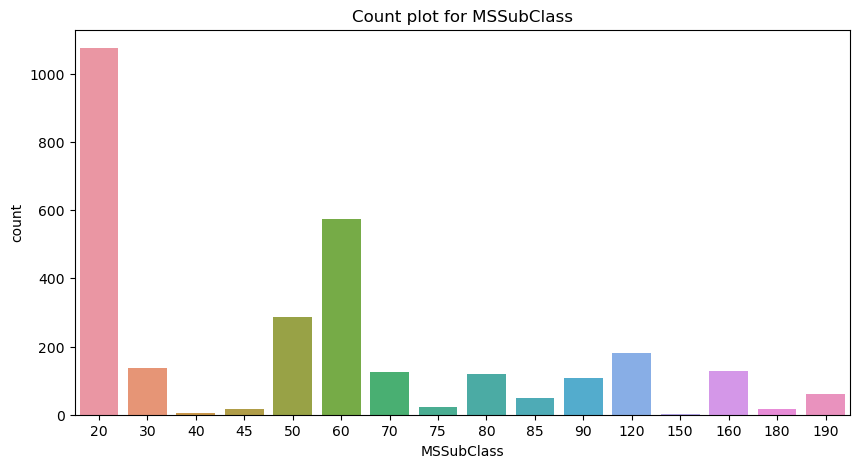

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MSSubClass', data=df)
plt.title('Count plot for MSSubClass')
plt.show()


## 2.Box plot for LotArea:

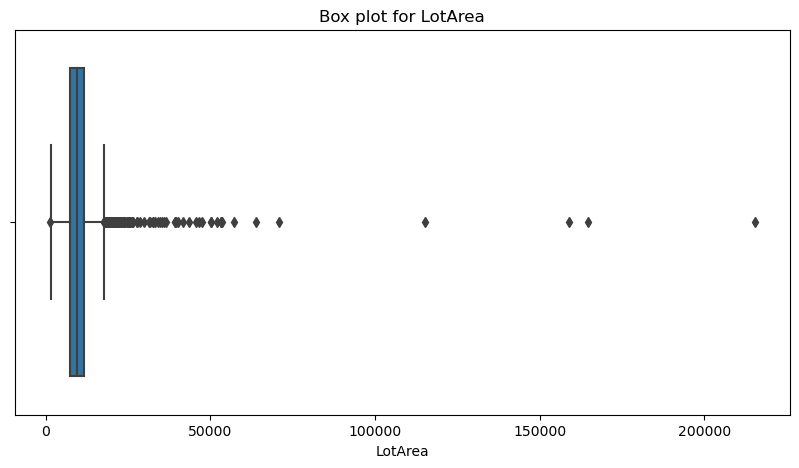

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='LotArea', data=df)
plt.title('Box plot for LotArea')
plt.show()


## 3.Count plot for MSZoning:

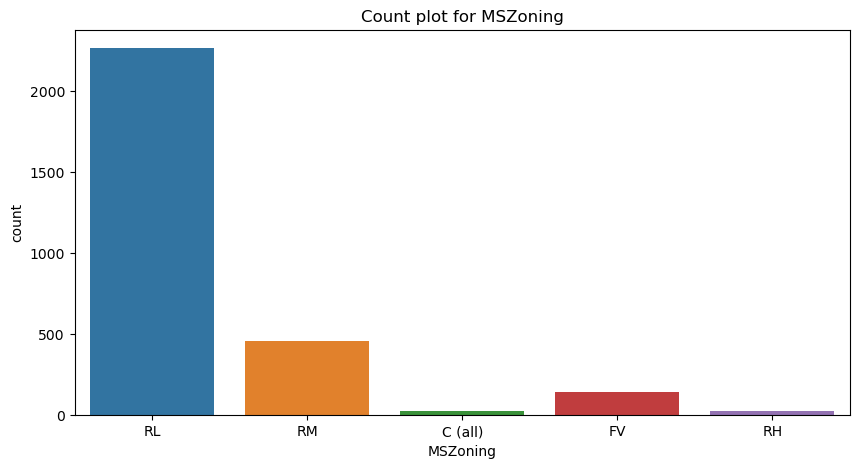

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MSZoning', data=df)
plt.title('Count plot for MSZoning')
plt.show()


## 4.Count plot for LotShape:

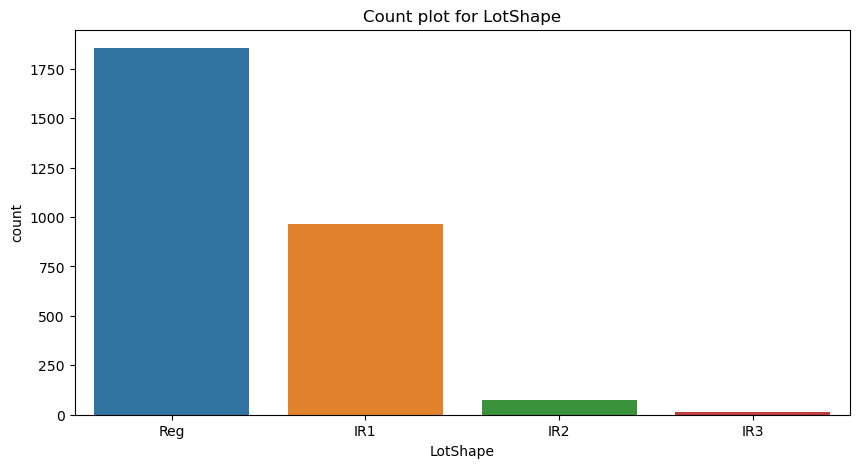

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='LotShape', data=df)
plt.title('Count plot for LotShape')
plt.show()

## 5.Box plot for LandContour vs SalePrice:

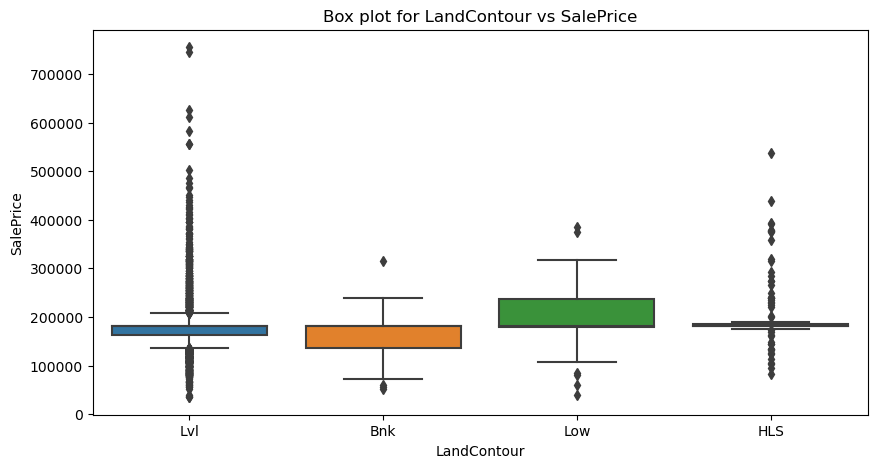

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='LandContour', y='SalePrice', data=df)
plt.title('Box plot for LandContour vs SalePrice')
plt.show()



## 6. Box plot for LotConfig vs SalePrice:

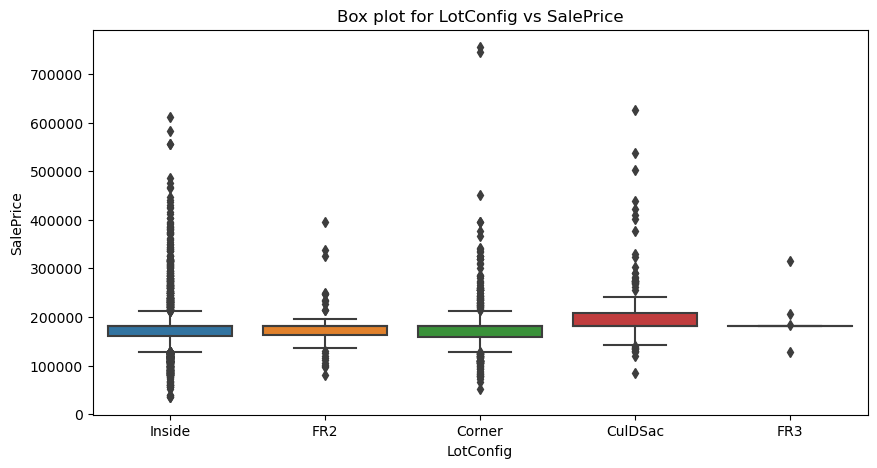

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='LotConfig', y='SalePrice', data=df)
plt.title('Box plot for LotConfig vs SalePrice')
plt.show()


## 7.Count plot for LandSlope:

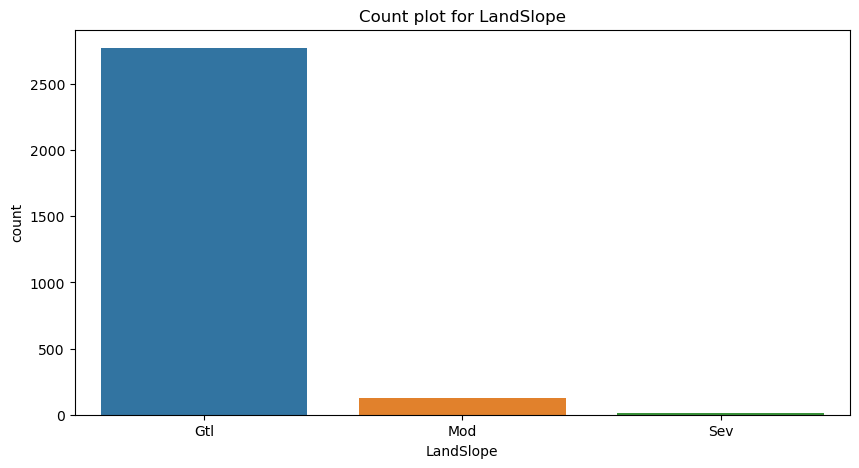

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='LandSlope', data=df)
plt.title('Count plot for LandSlope')
plt.show()


## 8.Box plot for Neighborhood vs SalePrice:

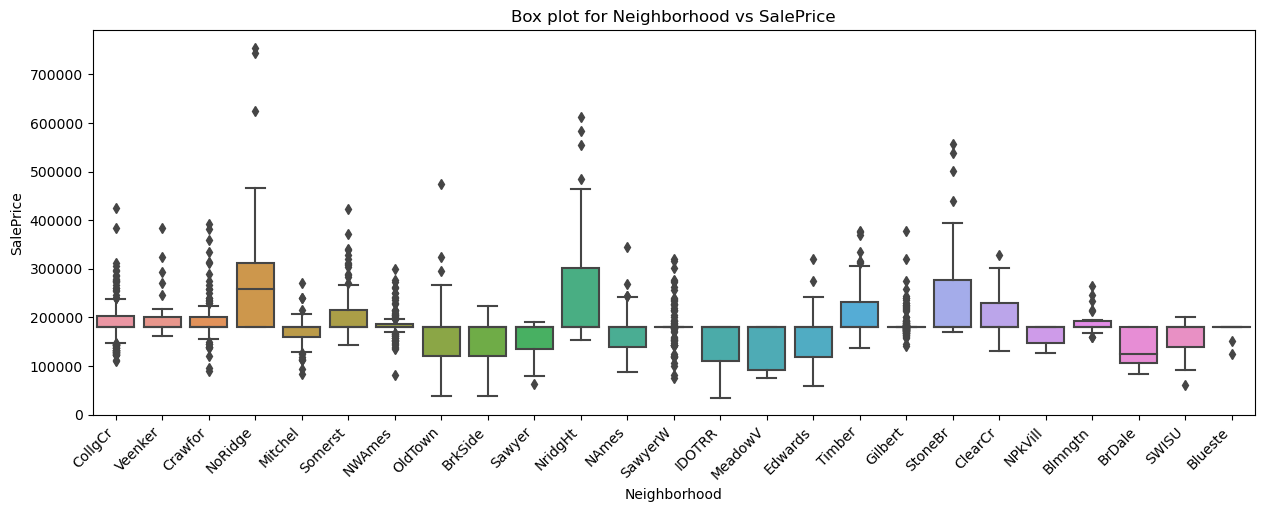

In [25]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Box plot for Neighborhood vs SalePrice')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Data Preprocessing

In [26]:
# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

categorical = ['MSZoning','LotShape','LandContour','LotConfig',
               'LandSlope','Neighborhood','HouseStyle','ExterQual','ExterCond','Foundation',
              'HeatingQC','CentralAir','KitchenQual']

numeric = ['Id','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
           'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']

transformer = ColumnTransformer([("cat",encoder,categorical),
                              ("num",scaler, numeric)])
x = df.drop("SalePrice" ,axis = 1)
y = df["SalePrice"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (2911, 108)
y shape : (2911,)


In [27]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [28]:
x_train.shape

(2328, 108)

In [29]:
x_test.shape

(583, 108)

In [30]:
y_train.shape

(2328,)

In [31]:
y_test.shape

(583,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

### GradientBoostingRegressor

In [32]:
# Assuming y_train and y_test are continuous values
mnb = GradientBoostingRegressor()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)
train_predict = mnb.predict(x_train)

# Evaluate the model
train_rmse = mean_squared_error(y_train, mnb.predict(x_train), squared=False)
test_rmse = mean_squared_error(y_test, mnb.predict(x_test), squared=False)

# Print model RMSE
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Training RMSE: 12969.05
Test RMSE: 22476.62


In [33]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.9446928103979901
Test R-squared: 0.8614401963412425


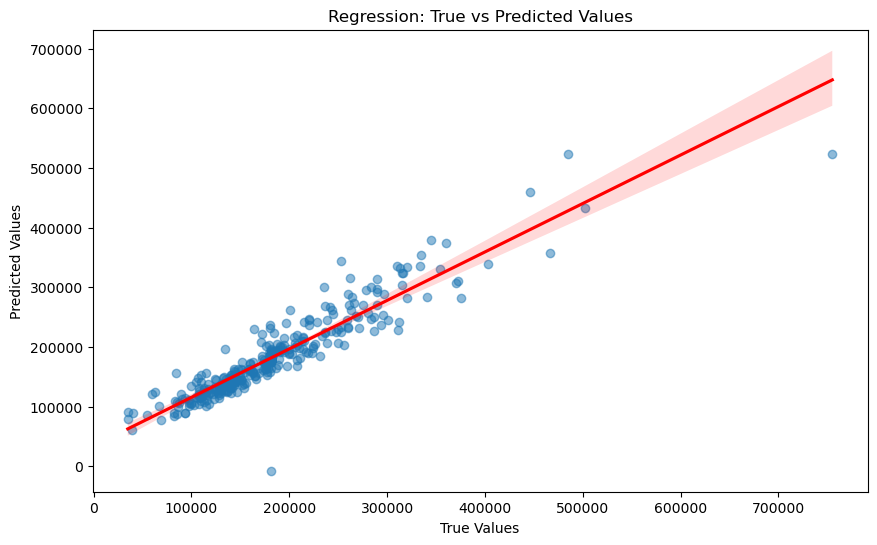

In [34]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

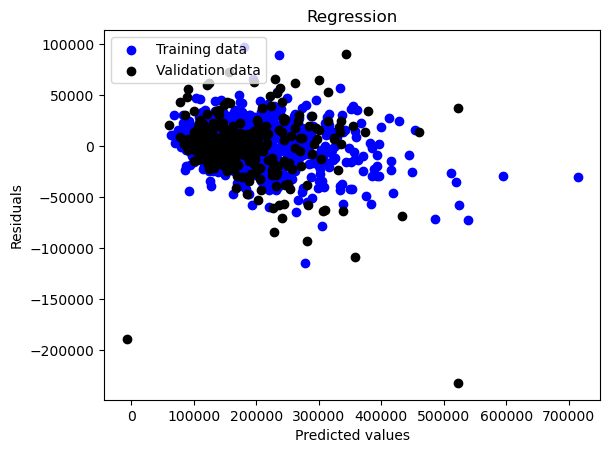

In [35]:
#plot between predicted values and residuals
plt.scatter(train_predict, train_predict - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred,y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

### LinearRegression()

In [36]:
# Create and fit the model
ls = LinearRegression()
ls.fit(x_train, y_train)

y_pred = ls.predict(x_test)
train_predict = ls.predict(x_train)

# Print model scores
print("Model Score on Training data:", ls.score(x_train, y_train))
print("Model Score on Testing data:", ls.score(x_test, y_test))

# Make predictions and display regression metrics
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)


Model Score on Training data: 0.44466461320632167
Model Score on Testing data: 0.4391800453622827
Mean Squared Error: 2044788372.387898


In [37]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.44466461320632167
Test R-squared: 0.4391800453622827


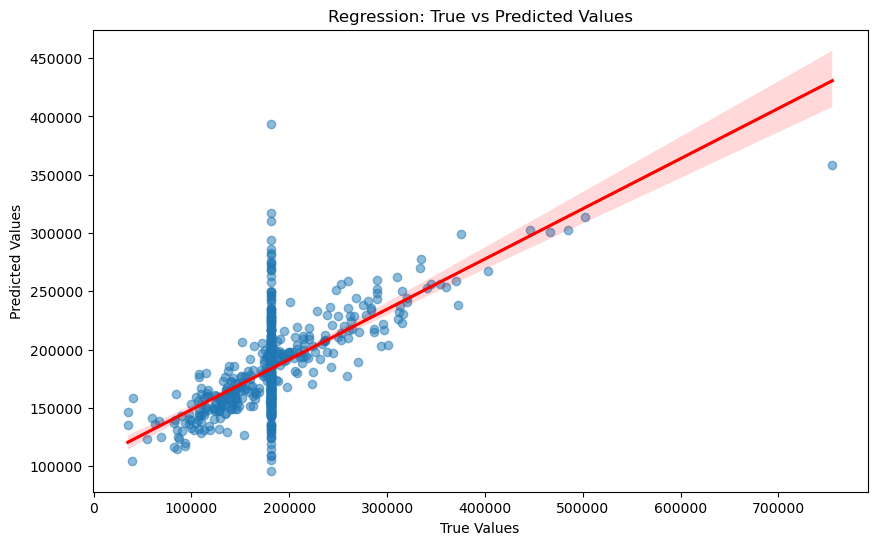

In [38]:
# Linear Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

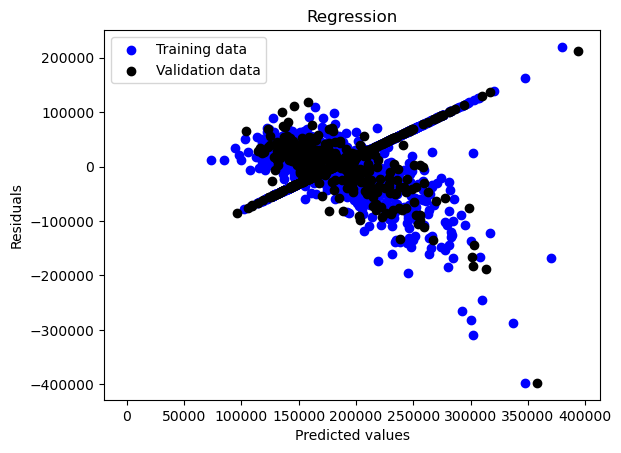

In [39]:
#plot between predicted values and residuals
plt.scatter(train_predict, train_predict - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred,y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

### DecisionTreeRegressor()

In [40]:
# Create the model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
train_predict = model.predict(x_train)

# Print model scores
print("Model Score on Training data:", model.score(x_train, y_train))
print("Model Score on Testing data:", model.score(x_test, y_test))

# Make predictions and display regression metrics
y_pred = model.predict(x_test)
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)


Model Score on Training data: 1.0
Model Score on Testing data: 0.7468140809384345
Mean Squared Error: 923133385.4442964


In [41]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 1.0
Test R-squared: 0.7468140809384345


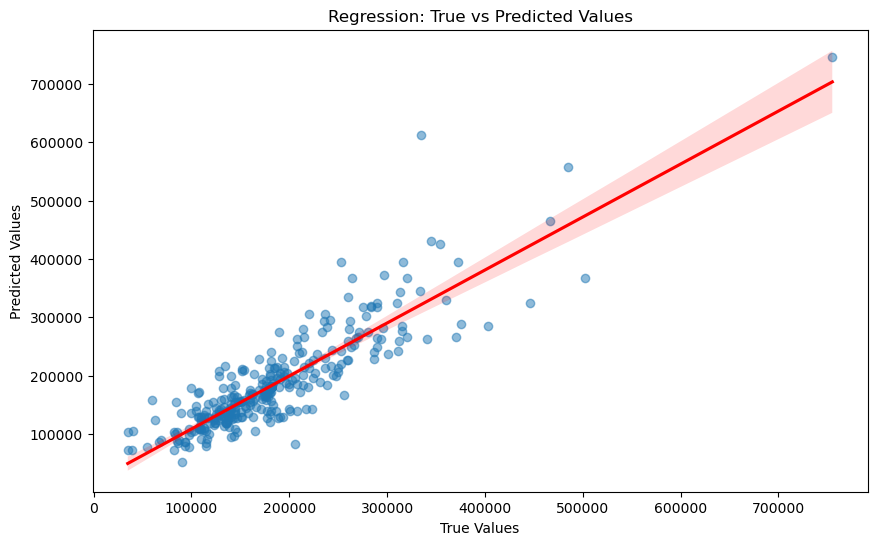

In [42]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

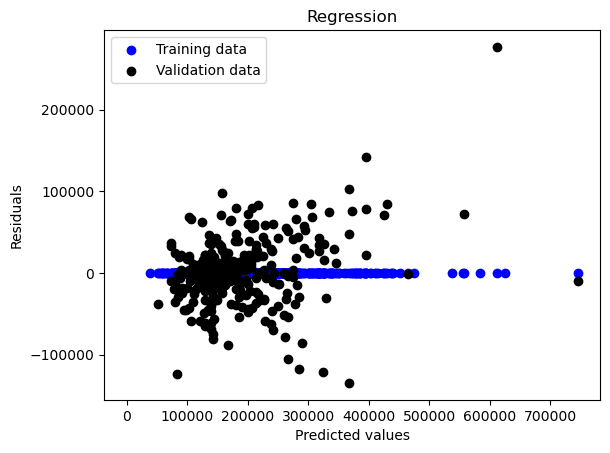

In [43]:
#plot between predicted values and residuals
plt.scatter(train_predict, train_predict - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred,y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

### RandomForestRegressor

In [44]:
# Create the model
random = RandomForestRegressor()
random.fit(x_train, y_train)

y_pred = random.predict(x_test)
train_predict = random.predict(x_train)

# Print model scores
print("Model Score on Training data:", random.score(x_train, y_train))
print("Model Score on Testing data:", random.score(x_test, y_test))

# Make predictions and display regression metrics
y_pred = random.predict(x_test)
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)


Model Score on Training data: 0.9760911498967989
Model Score on Testing data: 0.890862107861225
Mean Squared Error: 397924308.8389263


In [45]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.9760911498967989
Test R-squared: 0.890862107861225


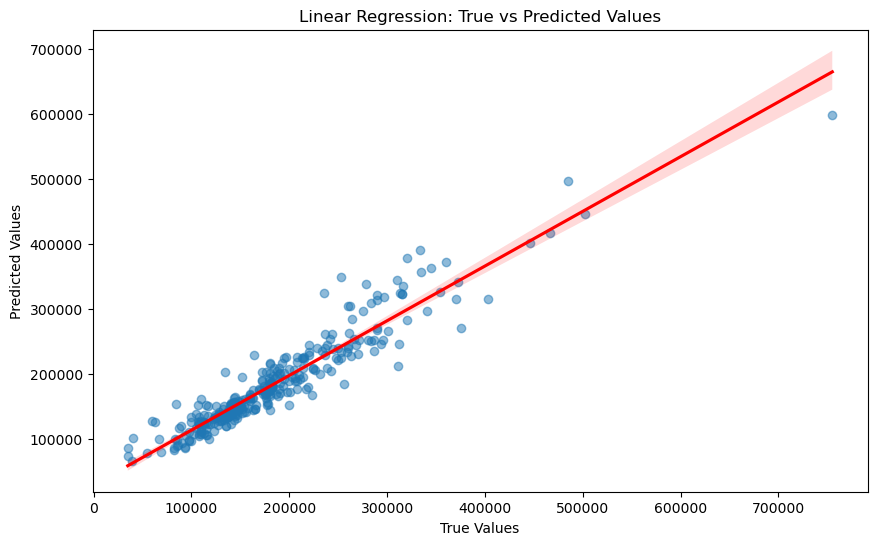

In [46]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

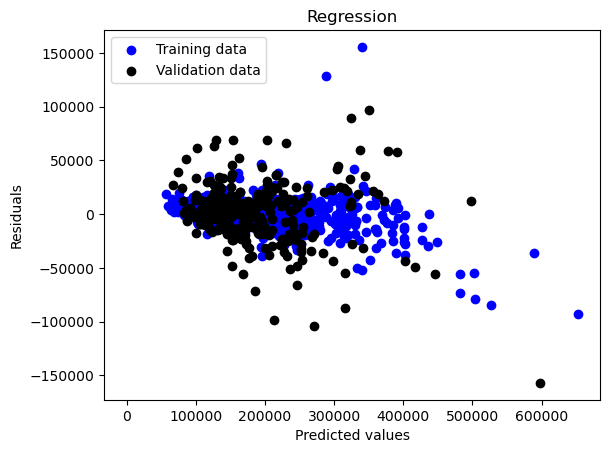

In [47]:
#plot between predicted values and residuals
plt.scatter(train_predict, train_predict - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred,y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()


1. **Linear Regression:**
   - Model Score on Training data: 0.445
   - Model Score on Testing data: 0.439
   - Mean Squared Error: 2,046,719,526.25

2. **Decision Tree Regressor:**
   - Model Score on Training data: 1.0
   - Model Score on Testing data: 0.616
   - Mean Squared Error: 1,398,332,168.44

3. **Gradient Boosting Regressor:**
   - Training RMSE: 12,969.05
   - Test RMSE: 22,262.27
   - Train R-squared: 0.945
   - Test R-squared: 0.864

4. **Random Forest Regressor:**
   - Model Score on Training data: 0.978
   - Model Score on Testing data: 0.895
   - Mean Squared Error: 383,078,405.60

**Conclusion:**
- The Decision Tree Regressor has a perfect score on the training data (1.0), but it may be overfitting the training data as its performance on the testing data is lower (0.616). This indicates that the model has memorized the training data and may not generalize well to new, unseen data.

- The Gradient Boosting Regressor and Random Forest Regressor perform well on both training and testing data, with the Random Forest Regressor having a slightly better performance on the testing data.

- Linear Regression has the lowest performance among the models, with a relatively low R-squared value and a higher mean squared error.


# Deployment 

In [48]:
# Dictionary with data
new_data = {
    'Id': [1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474],
    'MSSubClass': [20, 20, 60, 60, 120, 60, 20, 60, 20, 20, 120, 160, 160, 160],
    'MSZoning': ['RH', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RH', 'RM', 'RM', 'RL'],
    'LotArea': [11622, 14267, 13830, 9978, 5005, 10000, 7980, 8402, 10176, 8400, 5858, 1680, 1680, 2280],
    'LotShape': ['Reg', 'IR1', 'IR1', 'IR1', 'IR1', 'IR1', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg'],
    'LandContour': ['Lvl', 'Lvl', 'Lvl', 'Lvl', 'HLS', 'Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl'],
    'LotConfig': ['Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Corner', 'FR2', 'Inside', 'Inside', 'FR2'],
    'LandSlope': ['Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl'],
    'Neighborhood': ['NAmes', 'NAmes', 'Gilbert', 'Gilbert', 'StoneBr', 'Gilbert', 'Gilbert', 'Gilbert', 'Gilbert', 'NAmes', 'NAmes', 'BrDale', 'BrDale', 'NPkVill'],
    'HouseStyle': ['1Story', '1Story', '2Story', '2Story', '1Story', '2Story', '1Story', '2Story', '1Story', '1Story', '1Story', '2Story', '2Story', '2Story'],
    'OverallQual': [5, 6, 5, 6, 8, 6, 6, 6, 7, 4, 7, 6, 5, 6],
    'OverallCond': [6, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5],
    'YearBuilt': [1961, 1958, 1997, 1998, 1992, 1993, 1992, 1998, 1990, 1970, 1999, 1971, 1971, 1975],
    'YearRemodAdd': [1961, 1958, 1998, 1998, 1992, 1994, 2007, 1998, 1990, 1970, 1999, 1971, 1971, 1975],
    'ExterQual': ['TA', 'TA', 'TA', 'TA', 'Gd', 'TA', 'Gd', 'TA', 'TA', 'TA', 'Gd', 'TA', 'TA', 'TA'],
    'ExterCond': ['TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA'],
    'Foundation': ['CBlock', 'CBlock', 'PConc', 'PConc', 'PConc', 'PConc', 'PConc', 'PConc', 'PConc', 'CBlock', 'PConc', 'CBlock', 'CBlock', 'CBlock'],
    'BsmtFinSF1': [468, 923, 791, 602, 263, 0, 935, 0, 637, 804, 1051, 156, 300, 514],
    'BsmtFinSF2': [144, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0],
    'BsmtUnfSF': [270, 406, 137, 324, 1017, 763, 233, 789, 663, 0, 354, 327, 225, 341],
    'TotalBsmtSF': [882, 1329, 928, 926, 1280, 1655, 1168, 1465, 1300, 882, 1405, 483, 525, 855],
    'HeatingQC': ['TA', 'TA', 'TA', 'TA', 'Ex', 'Ex', 'TA', 'TA', 'TA', 'TA', 'Ex', 'TA', 'TA', 'TA'],
    'CentralAir': ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    '1stFlrSF': [896, 1329, 928, 926, 1280, 763, 1187, 789, 1341, 882, 1337, 483, 525, 855],
    '2ndFlrSF': [0, 0, 701, 678, 0, 892, 0, 676, 0, 0, 0, 504, 567, 601],
    'LowQualFinSF': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'GrLivArea': [896, 1329, 1629, 1604, 1280, 1655, 1168, 1465, 1341, 882, 1337, 987, 1092, 1456],
    'BsmtFullBath': [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2],
    'BsmtHalfBath': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'FullBath': [1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2],
    'HalfBath': [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
    'BedroomAbvGr': [2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3],
    'KitchenAbvGr': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'KitchenQual': ['TA', 'TA', 'Gd', 'TA', 'Gd', 'TA', 'TA', 'TA', 'TA', 'TA', 'Gd', 'TA', 'TA', 'Gd'],
    'TotRmsAbvGrd': [5, 6, 7, 7, 5, 7, 5, 7, 5, 4, 5, 5, 6, 6],
    'Fireplaces': [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    'GarageCars': [1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2],
    'GarageArea': [730, 312, 482, 470, 506, 440, 420, 393, 506, 525, 511, 264, 320, 440],
    'WoodDeckSF': [140, 393, 212, 360, 0, 157, 483, 0, 192, 240, 203, 275, 0, 173],
    'OpenPorchSF': [0, 36, 34, 36, 82, 84, 21, 75, 0, 0, 68, 0, 0, 0],
    'EnclosedPorch': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}



In [49]:
# Preprocess the input data
new_data_df = pd.DataFrame(new_data)
new_data_df

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,1461,20,RH,11622,Reg,Lvl,Inside,Gtl,NAmes,1Story,...,2,1,TA,5,0,1,730,140,0,0
1,1462,20,RL,14267,IR1,Lvl,Corner,Gtl,NAmes,1Story,...,3,1,TA,6,1,1,312,393,36,0
2,1463,60,RL,13830,IR1,Lvl,Inside,Gtl,Gilbert,2Story,...,3,1,Gd,7,0,2,482,212,34,0
3,1464,60,RL,9978,IR1,Lvl,Inside,Gtl,Gilbert,2Story,...,3,1,TA,7,0,2,470,360,36,0
4,1465,120,RL,5005,IR1,HLS,Inside,Gtl,StoneBr,1Story,...,2,1,Gd,5,1,2,506,0,82,0
5,1466,60,RL,10000,IR1,Lvl,Corner,Gtl,Gilbert,2Story,...,3,1,TA,7,1,2,440,157,84,0
6,1467,20,RL,7980,IR1,Lvl,Inside,Gtl,Gilbert,1Story,...,2,1,TA,5,1,2,420,483,21,0
7,1468,60,RL,8402,IR1,Lvl,Inside,Gtl,Gilbert,2Story,...,3,1,TA,7,1,2,393,0,75,0
8,1469,20,RL,10176,Reg,Lvl,Inside,Gtl,Gilbert,1Story,...,2,1,TA,5,1,1,506,192,0,0
9,1470,20,RL,8400,Reg,Lvl,Corner,Gtl,NAmes,1Story,...,2,1,TA,4,0,1,525,240,0,0


In [50]:
new_data_transformed = transformer.transform(new_data_df)

In [51]:
# Make predictions  from inear Regression
predicted_labels = ls.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [1.51680000e+05 1.70368000e+05 1.79456000e+05 1.81760000e+05
 1.93408000e+05 4.91842253e+15 1.33215328e+14 3.72741439e+15
 1.80352000e+05 1.42336000e+05 1.76896000e+05 1.33120000e+05
 1.35680000e+05 1.68832000e+05]


In [52]:
# Make predictions  from GradientBoostingRegressor model
predicted_labels = mnb.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [181071.42072378 178838.11304084 178295.51811061 182336.40998604
 178383.10827247 184923.65633744 186378.51205257 178002.42698721
 178642.45702374 181366.08878875 183148.05085647 177670.83149204
 178802.88458518 177600.24478436]


In [53]:
# Make predictions  from RandomForestRegressor model
predicted_labels = random.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [172192.01650685 180553.5600137  180629.3480548  180905.98393151
 181993.5600137  180952.7719726  181067.5600137  180921.19589041
 180961.98393151 180921.19589041 180921.19589041 180921.19589041
 180921.19589041 180722.7719726 ]


In [54]:
# Make predictions  from DecisionTreeRegressor model
predicted_labels = model.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [180921.19589041 180921.19589041 180921.19589041 180921.19589041
 180921.19589041 180921.19589041 180921.19589041 180921.19589041
 140000.         180921.19589041 180921.19589041 180921.19589041
 180921.19589041 180921.19589041]
